# TASK -02
## Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [26]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
from sklearn.cluster import KMeans
m.style.use('dark_background')

## Data Overview:-

In [27]:
retail=p.read_csv('Customers.csv')
retail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
retail.shape

(200, 5)

###### Total Number of Rows= 200 and Number of Columns=5

In [29]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
retail.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Analysis:-

C:\Users\samee\AppData\Local\Temp\ipykernel_20396\1319648817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(retail[i])
C:\Users\samee\AppData\Local\Temp\ipykernel_20396\1319648817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(retail[i])
C:\Users\samee\AppData\Local\Temp\ipykernel_20396\13

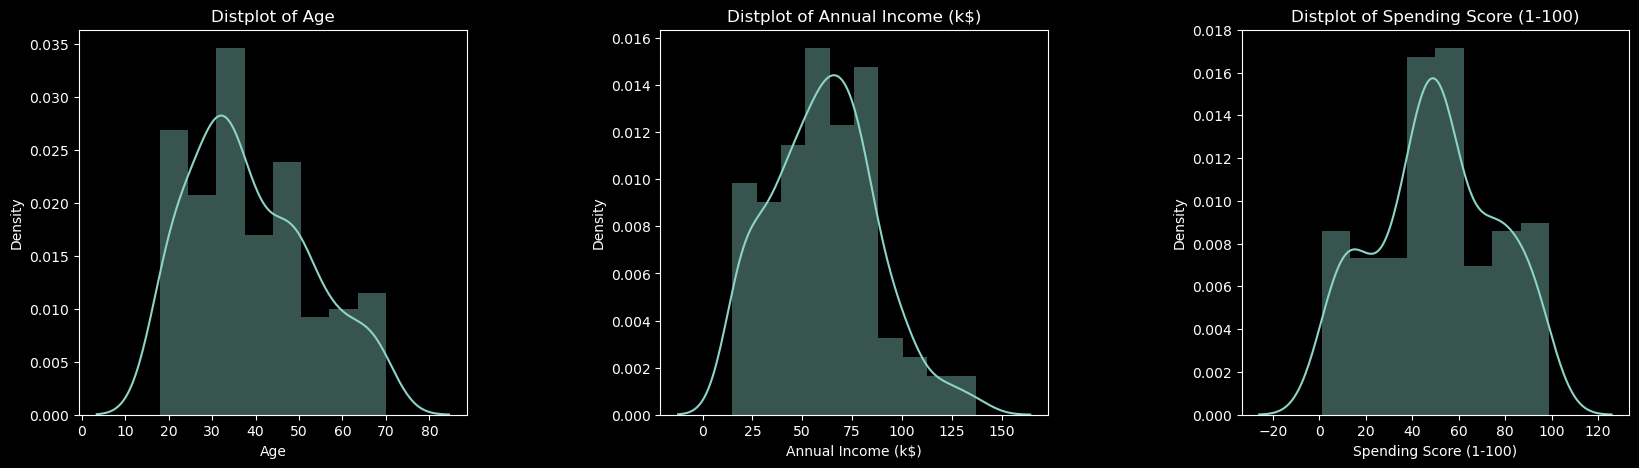

In [31]:
m.figure(1,figsize=(20,5))
n=1
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    m.subplot(1,3,n)
    m.subplots_adjust(hspace=0.5,wspace=0.5)
    s.distplot(retail[i])
    m.title(f'Distplot of {i}')
    n+=1
m.show()

<Axes: xlabel='Gender', ylabel='count'>

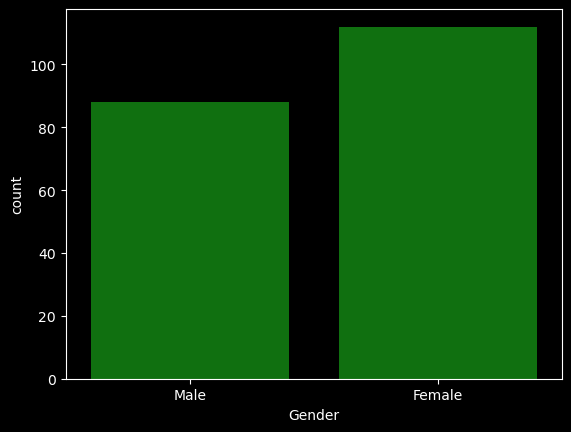

In [32]:
s.countplot(data=retail,x='Gender',color='g')

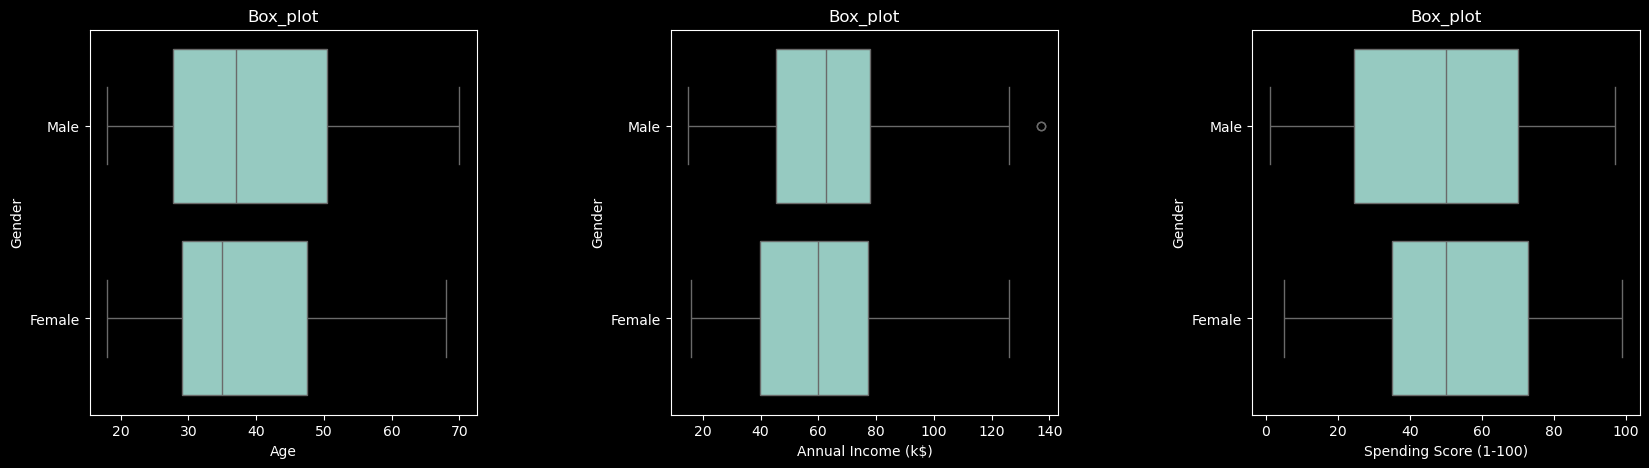

In [33]:
m.figure(1,figsize=(20,5))
n=1
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    m.subplot(1,3,n)
    m.subplots_adjust(hspace=0.5,wspace=0.5)
    s.boxplot(data=retail,x=i,y='Gender')
    m.title('Box_plot')
    n+=1
m.show()

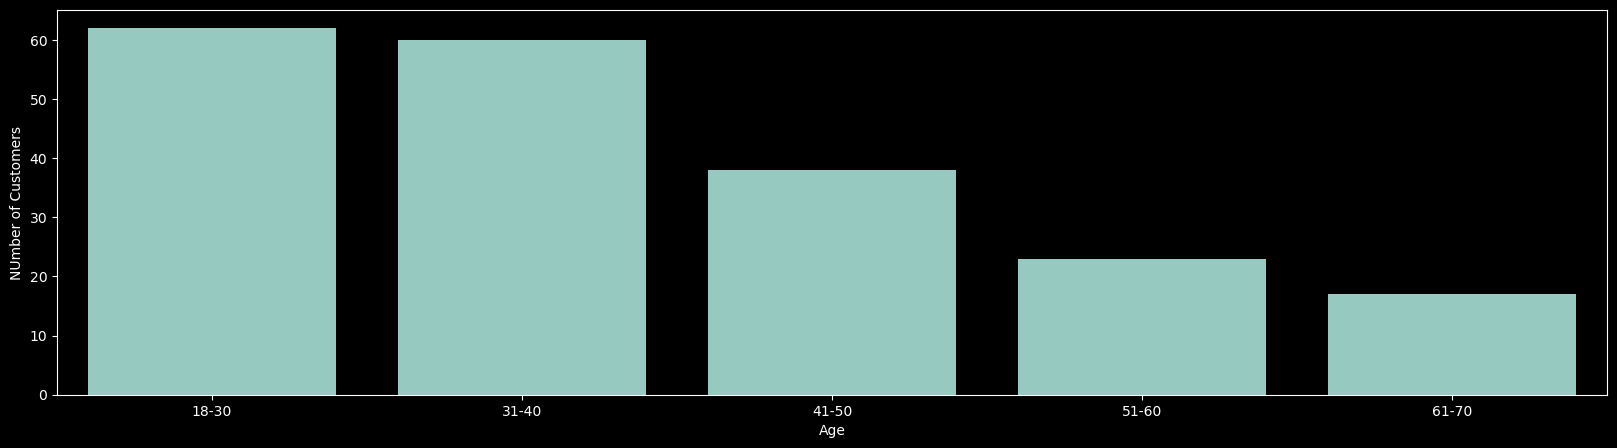

In [34]:
age18_30=retail.Age[(retail.Age >= 18) & (retail.Age <= 30)]
age31_40=retail.Age[(retail.Age >= 31) & (retail.Age <= 40)]
age41_50=retail.Age[(retail.Age >= 41) & (retail.Age <= 50)]
age51_60=retail.Age[(retail.Age >= 51) & (retail.Age <= 60)]
age61_70=retail.Age[(retail.Age >= 61) & (retail.Age <= 70)]
x=['18-30','31-40','41-50','51-60','61-70']
y=[len(age18_30),len(age31_40),len(age41_50),len(age51_60),len(age61_70)]
m.figure(figsize=(20,5))
s.barplot(x=x,y=y)
m.xlabel('Age')
m.ylabel('NUmber of Customers')
m.show()

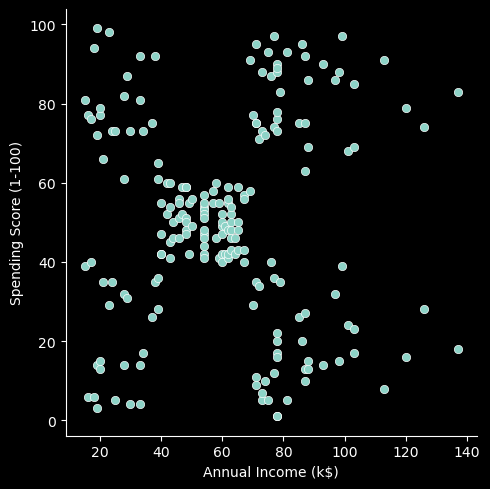

In [35]:
s.relplot(data=retail,x='Annual Income (k$)',y='Spending Score (1-100)')

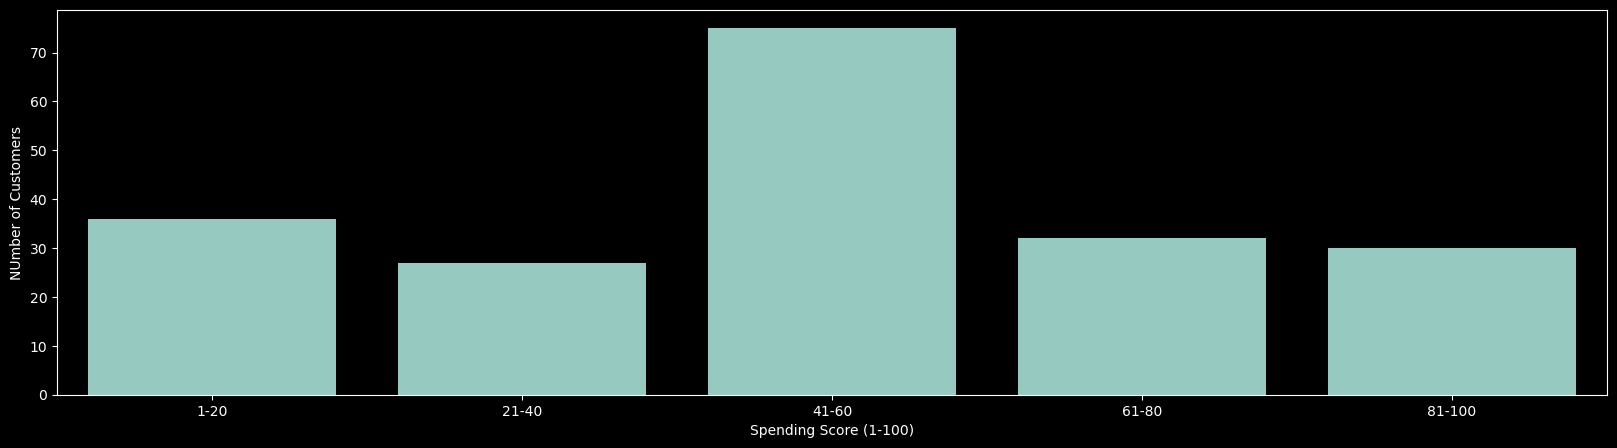

In [36]:
ss1_20=retail['Spending Score (1-100)'][(retail['Spending Score (1-100)'] >= 1) & (retail['Spending Score (1-100)'] <= 20)]
ss21_40=retail['Spending Score (1-100)'][(retail['Spending Score (1-100)'] >= 21) & (retail['Spending Score (1-100)'] <= 40)]
ss41_60=retail['Spending Score (1-100)'][(retail['Spending Score (1-100)'] >= 41) & (retail['Spending Score (1-100)'] <= 60)]
ss61_80=retail['Spending Score (1-100)'][(retail['Spending Score (1-100)'] >= 61) & (retail['Spending Score (1-100)'] <= 80)]
ss81_100=retail['Spending Score (1-100)'][(retail['Spending Score (1-100)'] >= 81) & (retail['Spending Score (1-100)'] <= 100)]
x=['1-20','21-40','41-60','61-80','81-100']
y=[len(ss1_20),len(ss21_40),len(ss41_60),len(ss61_80),len(ss81_100)]
m.figure(figsize=(20,5))
s.barplot(x=x,y=y)
m.xlabel('Spending Score (1-100)')
m.ylabel('NUmber of Customers')
m.show()

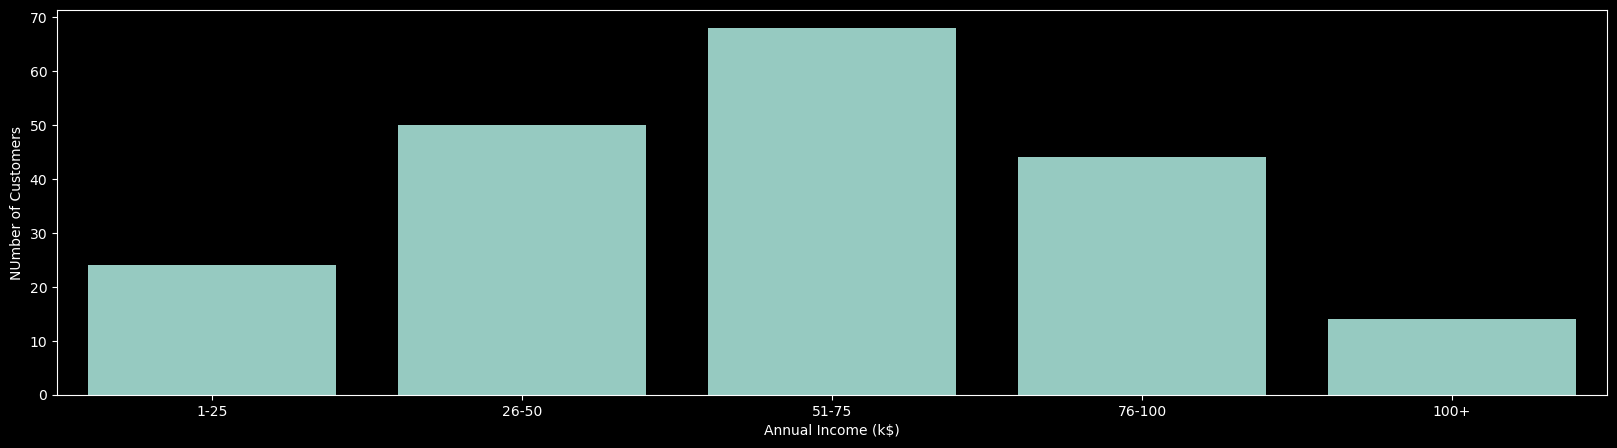

In [37]:
ai1_25=retail['Annual Income (k$)'][(retail['Annual Income (k$)'] >= 1) & (retail['Annual Income (k$)'] <= 25)]
ai26_50=retail['Annual Income (k$)'][(retail['Annual Income (k$)'] >= 26) & (retail['Annual Income (k$)'] <= 50)]
ai51_75=retail['Annual Income (k$)'][(retail['Annual Income (k$)'] >= 51) & (retail['Annual Income (k$)'] <= 75)]
ai76_100=retail['Annual Income (k$)'][(retail['Annual Income (k$)'] >= 76) & (retail['Annual Income (k$)'] <= 100)]
ai101=retail['Annual Income (k$)'][retail['Annual Income (k$)'] >= 101]
x=['1-25','26-50','51-75','76-100','100+']
y=[len(ai1_25),len(ai26_50),len(ai51_75),len(ai76_100),len(ai101)]
m.figure(figsize=(20,5))
s.barplot(x=x,y=y)
m.xlabel('Annual Income (k$)')
m.ylabel('NUmber of Customers')
m.show()

## Data Wrangling:-

In [38]:
retail.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### Since there are no null values so no need to clean tha data

## Implementing KMeans Algorithm:-

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

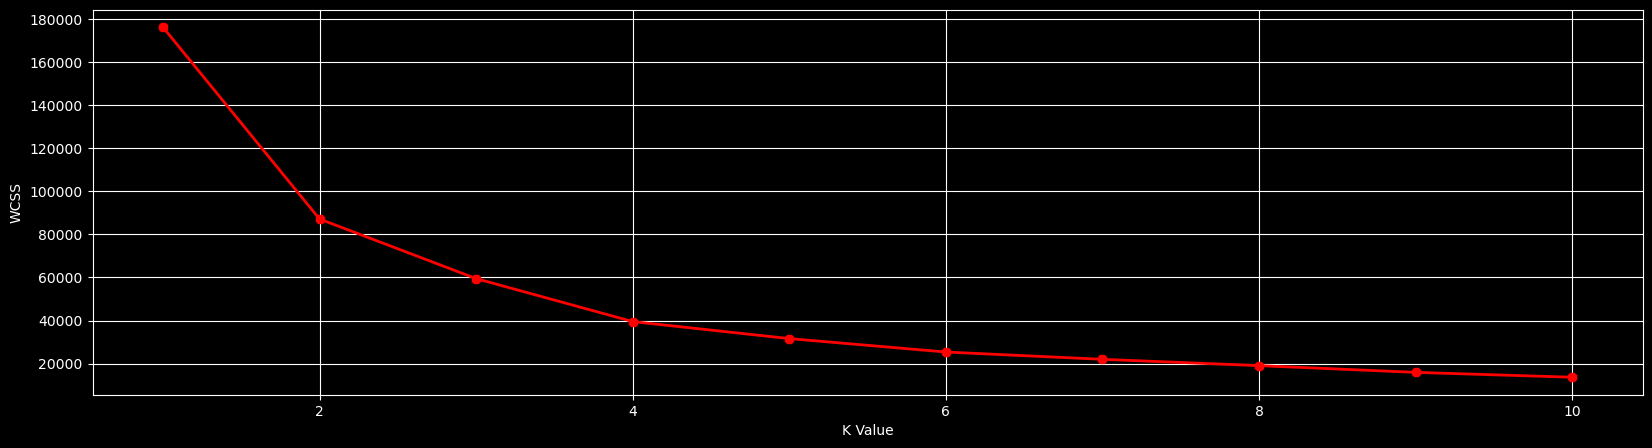

In [39]:
x=retail.iloc[:,2:4]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
m.figure(figsize=(20,5))
m.grid()
m.plot(range(1,11),wcss,linewidth=2,color='r',marker='8')
m.xlabel('K Value')
m.ylabel('WCSS')
m.show()

In [40]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x)
print(label)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0 4 4 0 0 0 0
 0 4 0 4 4 0 0 4 0 0 4 0 0 4 4 0 0 4 0 4 4 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0
 4 4 4 4 4 0 0 0 1 4 1 1 1 4 1 1 1 0 1 1 1 4 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [41]:
print(kmeans.cluster_centers_)

[[ 56.38461538  50.13461538]
 [ 37.45454545  78.72727273]
 [ 30.21428571  27.07142857]
 [ 36.6        109.7       ]
 [ 25.06451613  59.48387097]]


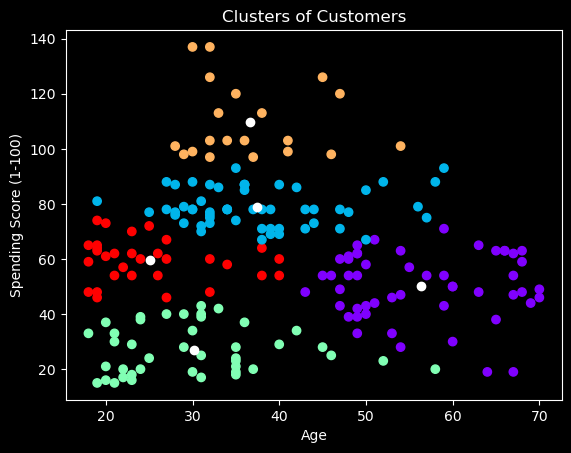

In [42]:
m.scatter(x.iloc[:,0],x.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
m.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='white')
m.title('Clusters of Customers')
m.xlabel('Age')
m.ylabel('Spending Score (1-100)')
m.show()

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

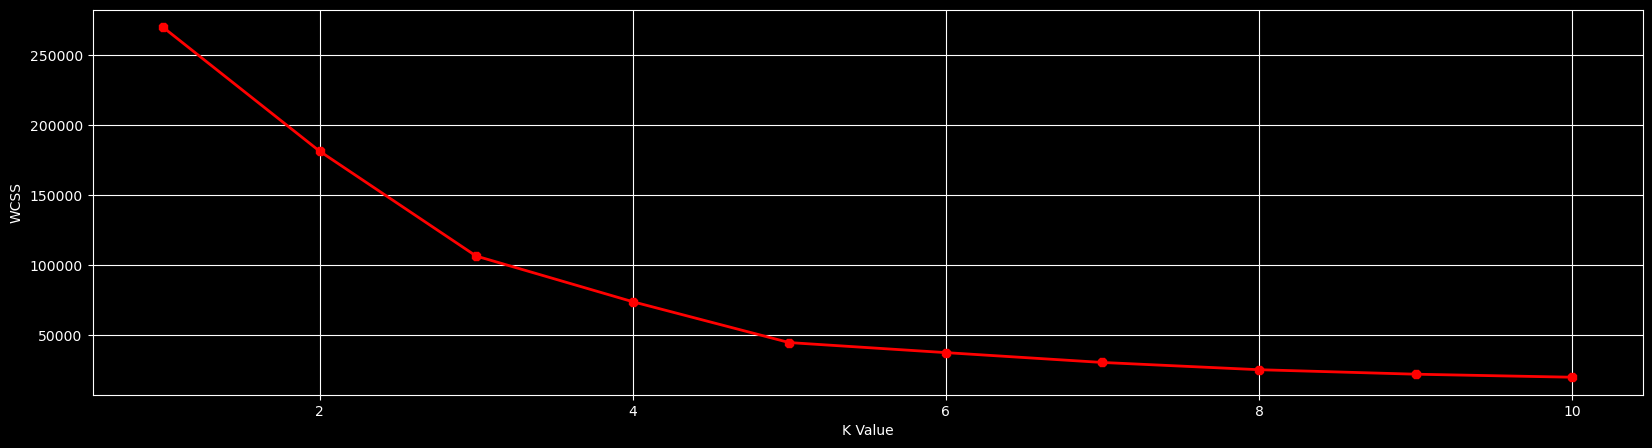

In [43]:
x=retail.iloc[:,3:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
m.figure(figsize=(20,5))
m.grid()
m.plot(range(1,11),wcss,linewidth=2,color='r',marker='8')
m.xlabel('K Value')
m.ylabel('WCSS')
m.show()

In [44]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x)
print(label)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [45]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


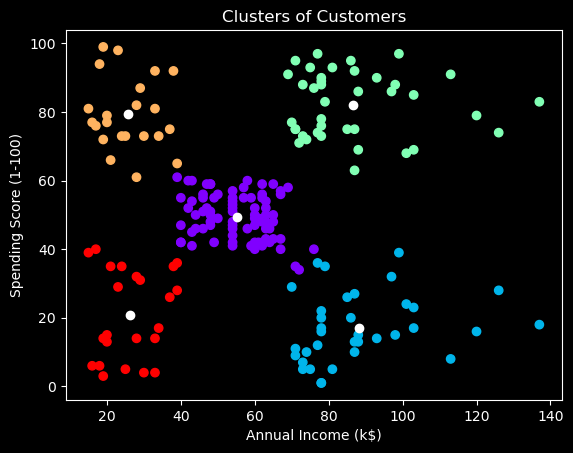

In [46]:
m.scatter(x.iloc[:,0],x.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
m.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='white')
m.title('Clusters of Customers')
m.xlabel('Annual Income (k$)')
m.ylabel('Spending Score (1-100)')
m.show()

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

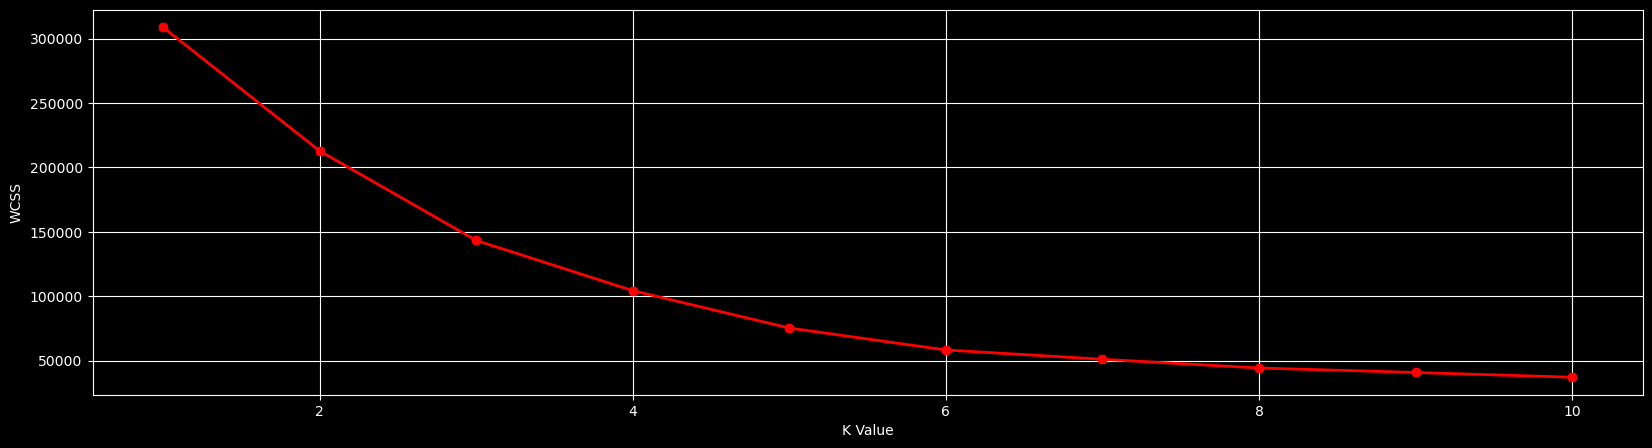

In [47]:
x=retail.iloc[:,2:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
m.figure(figsize=(20,5))
m.grid()
m.plot(range(1,11),wcss,linewidth=2,color='r',marker='8')
m.xlabel('K Value')
m.ylabel('WCSS')
m.show()

In [48]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x)
retail['Label']=label
print(label)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [49]:
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]]


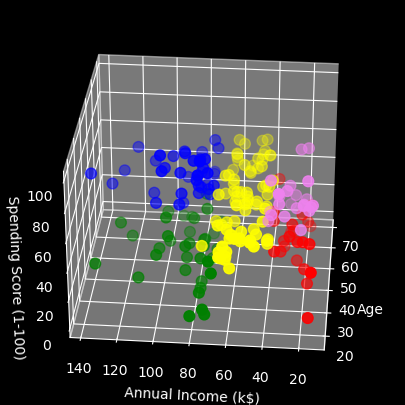

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig=m.figure(figsize=(20,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(retail.Age[retail.Label==0],retail['Annual Income (k$)'][retail.Label==0],retail['Spending Score (1-100)'][retail.Label==0],c='yellow',s=60)
ax.scatter(retail.Age[retail.Label==1],retail['Annual Income (k$)'][retail.Label==1],retail['Spending Score (1-100)'][retail.Label==1],c='green',s=60)
ax.scatter(retail.Age[retail.Label==2],retail['Annual Income (k$)'][retail.Label==2],retail['Spending Score (1-100)'][retail.Label==2],c='red',s=60)
ax.scatter(retail.Age[retail.Label==3],retail['Annual Income (k$)'][retail.Label==3],retail['Spending Score (1-100)'][retail.Label==3],c='blue',s=60)
ax.scatter(retail.Age[retail.Label==4],retail['Annual Income (k$)'][retail.Label==4],retail['Spending Score (1-100)'][retail.Label==4],c='violet',s=60)
ax.view_init(30,185)
m.xlabel('Age')
m.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
m.show()